In [1]:
import numpy as np
import matplotlib.pyplot as plt

from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Flatten
from keras.layers import Conv2D, AveragePooling2D, MaxPool2D
from keras.datasets import mnist
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split

In [ ]:
# Veriyi alıyoruz.
(X_train,y_train),(X_test,y_test) =mnist.load_data() 

# Ölçekleme  : sayıları küçültmek 0-1 arasına çekmek amaç
X_train=X_train.astype('float32')/255
X_test = X_test.astype('float32')/255


X_train=np.expand_dims(X_train,-1)   #2 boyut olduğu için 3.boyutu ekliyoruz. (28,28) iken (28,28,1) yaptık.
X_test=np.expand_dims(X_test,-1)




In [ ]:
# Modeli kategorik hale getiriyoruz, getirmezsek eğitemeyiz.
# ONE-HUT ENCODİNG
#X_train= to_categorical(X_train)
y_train= to_categorical(y_train)
y_test= to_categorical(y_test)
y_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [ ]:
# LeNet-5 Sequential

model=Sequential()

#conv1
model.add(Conv2D(filters=6,kernel_size=(5,5),strides=(1,1),activation='tanh',input_shape=(28,28,1)))

#pooling
model.add(AveragePooling2D(pool_size=(2,2),strides=(2,2)))

#conv2
model.add(Conv2D(filters=16,kernel_size=(5,5),strides=(1,1),activation='tanh'))

#pooling2
model.add(AveragePooling2D(pool_size=(2,2),strides=(2,2)))

#flatten : elde ettiğimiz yapıları düzleştirme
model.add(Flatten())

#Tam bağımlı katmanları ekleyeceğiz.
model.add(Dense(120,activation='tanh'))
model.add(Dense(84,activation='tanh'))
model.add(Dense(10,activation='softmax'))  #son katmanın activation fonks. softmax kullanmalıyız çünkü en büyük olanı vericek

model.summary()



# ilk sırada gelen 156 parametre bizim 5*5 *6 adet filtremiz var çarpınca ağırlığımız 150 ediyor, her filtreye 1 adet bias ekleyince:
# 5*5*6 = 150 + 6 = 156 parametre olur

# Poolinglerde öğrenilecek bir şey yok sadece havuzlama işlemi yapılıyor.

# ikinci param kısmında ise 5*5*16 adet filtre vardı + 16 adet bias

# Elimizde 5*5*16 adet özellik haritası var bunları vektörler hale getirindce (flat edince) 400 oluyor.

# 256*120 + 120
# 120*84* +84
# 84*10 +10 

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_26 (Conv2D)          (None, 24, 24, 6)         156       
                                                                 
 average_pooling2d_26 (Avera  (None, 12, 12, 6)        0         
 gePooling2D)                                                    
                                                                 
 conv2d_27 (Conv2D)          (None, 8, 8, 16)          2416      
                                                                 
 average_pooling2d_27 (Avera  (None, 4, 4, 16)         0         
 gePooling2D)                                                    
                                                                 
 flatten_13 (Flatten)        (None, 256)               0         
                                                                 
 dense_39 (Dense)            (None, 120)             

In [ ]:
# Sequentinal api : Bir liste stack tutup  
# Functional api : daha esnek, 
# yaptıkları iş aynı
# geçen haftakini sequentinal api ile yapmıştık aynısını functional ile oluştur yap

In [5]:
# LeNet-5 Functional Api

# Kullanmaya alışalım bu önemli...

from keras.layers import Input
from keras.models import Model

input = Input(shape=(28,28,1)) # girdi

x=Conv2D(6,kernel_size=(5,5),activation='tanh',strides=(1,1))(input)  # girdiler köşeden alınır o yüzden girdiyi vermemiz lazım
x=AveragePooling2D(strides=(2,2))(x) # burda da bir önceki katmanı veriyoruz(x)

x=Conv2D(16,kernel_size=(5,5),activation='tanh',strides=(1,1))(x)
x=AveragePooling2D(strides=(2,2))(x)

x=Flatten()(x)

x=Dense(120,activation='tanh')(x)
x=Dense(84,activation='tanh')(x)
output=Dense(10,activation='softmax')(x)

#modeli oluşturabiliriz
model = Model(inputs=input,outputs=output)

model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_2 (Conv2D)           (None, 24, 24, 6)         156       
                                                                 
 average_pooling2d (AverageP  (None, 12, 12, 6)        0         
 ooling2D)                                                       
                                                                 
 conv2d_3 (Conv2D)           (None, 8, 8, 16)          2416      
                                                                 
 average_pooling2d_1 (Averag  (None, 4, 4, 16)         0         
 ePooling2D)                                                     
                                                                 
 flatten (Flatten)           (None, 256)               0     

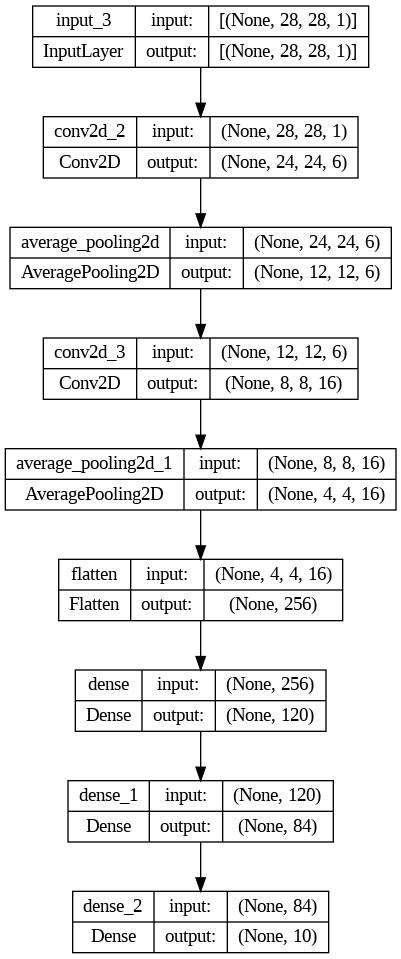

In [6]:
from keras.utils.vis_utils import plot_model
plot_model(model,to_file='model_plot.png',show_shapes=True,show_layer_names=True)

In [ ]:
# Modeli derleyelim eğitelim
model.compile(loss="categorical_crossentropy",optimizer="adam",metrics=['accuracy'])

history = model.fit(X_train,y_train,batch_size=128,epochs=15,validation_split=0.1,validation_batch_size=128)

Epoch 1/15
422/422 [==============================] - 15s 34ms/step - loss: 0.1167 - accuracy: 0.9648 - val_loss: 0.0828 - val_accuracy: 0.9742
Epoch 2/15
422/422 [==============================] - 14s 34ms/step - loss: 0.0724 - accuracy: 0.9776 - val_loss: 0.0555 - val_accuracy: 0.9850
Epoch 3/15
422/422 [==============================] - 14s 34ms/step - loss: 0.0560 - accuracy: 0.9824 - val_loss: 0.0622 - val_accuracy: 0.9825
Epoch 4/15
422/422 [==============================] - 15s 36ms/step - loss: 0.0472 - accuracy: 0.9854 - val_loss: 0.0468 - val_accuracy: 0.9867
Epoch 5/15
422/422 [==============================] - 14s 34ms/step - loss: 0.0383 - accuracy: 0.9881 - val_loss: 0.0518 - val_accuracy: 0.9855
Epoch 6/15
422/422 [==============================] - 18s 42ms/step - loss: 0.0346 - accuracy: 0.9891 - val_loss: 0.0471 - val_accuracy: 0.9868
Epoch 7/15
422/422 [==============================] - 18s 42ms/step - loss: 0.0285 - accuracy: 0.9909 - val_loss: 0.0487 - val_accuracy:

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


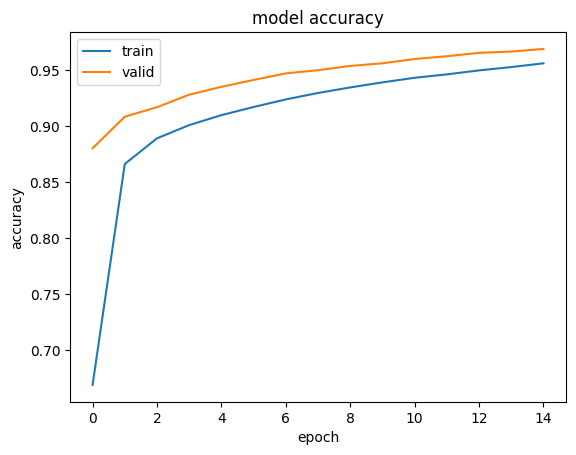

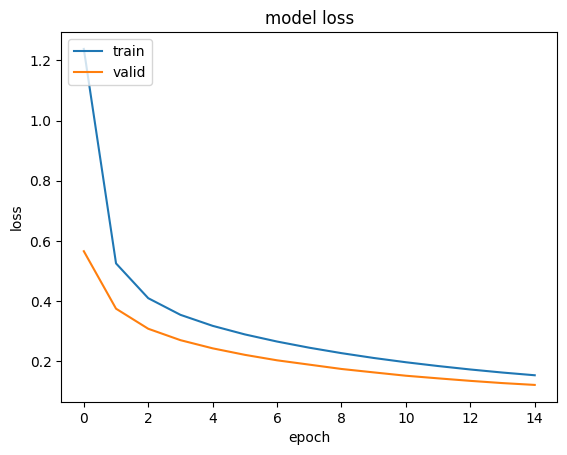

In [ ]:
import matplotlib.pyplot as plt

print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'valid'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'valid'], loc='upper left')
plt.show()


# Testin eğitimden daha başarılı olması bir problem mi? sorun var validin trainden daha düşük olması lazım
# Gerekirse belki sınavda sorarız.
# belki bizim optimizasyon algosunda sorun vardır diye optimizer'ı sgd'den adam'a çevirdik,
# çevirince bu sorun kalktı fakat valid oranımız düştü bu neyi ifade eder? (madem cevap yok sınavda sorarız)
# burada optimizerın'da büyük bir etkisi var

In [ ]:
# Scoreları alalım
scores=model.evaluate(X_train,y_train)
print("Training Accuracy:",scores[1]*100)

scores=model.evaluate(X_test,y_test)
print("Test Accuracy:",scores[1]*100)

1875/1875 [==============================] - 9s 5ms/step - loss: 0.1455 - accuracy: 0.9583
Training Accuracy: 95.82666754722595
313/313 [==============================] - 1s 5ms/step - loss: 0.1378 - accuracy: 0.9601
Test Accuracy: 96.0099995136261


In [ ]:
# Tahmin ettirelim
y_pred = np.argmax(model.predict(X_test),axis=-1)

y_pred[0]

313/313 [==============================] - 1s 4ms/step


7

In [ ]:
# Bunun için modeli eski haline getirmemiz lazım (one-hut encodingi geri çevircez) (veriyi ilk okuduğumuz bloğu geri okuyup hallettik)
from sklearn.metrics import classification_report

from sklearn.metrics import confusion_matrix

print(classification_report(y_test,y_pred,digits=3))

print(confusion_matrix(y_test,y_pred))

              precision    recall  f1-score   support

           0      0.962     0.987     0.974       980
           1      0.982     0.986     0.984      1135
           2      0.957     0.955     0.956      1032
           3      0.947     0.959     0.953      1010
           4      0.964     0.958     0.961       982
           5      0.964     0.948     0.956       892
           6      0.969     0.974     0.971       958
           7      0.958     0.945     0.951      1028
           8      0.951     0.948     0.949       974
           9      0.945     0.938     0.941      1009

    accuracy                          0.960     10000
   macro avg      0.960     0.960     0.960     10000
weighted avg      0.960     0.960     0.960     10000

[[ 967    0    1    0    0    1    4    1    6    0]
 [   0 1119    3    2    0    0    3    0    8    0]
 [   5    0  986    8    3    1    7   11    9    2]
 [   0    0   13  969    0    7    0   10    8    3]
 [   1    0    3    0  941   